In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = '/content/synthetic_iris_like_data.csv'
data = pd.read_csv(file_path)

# Split the data into features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Display the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the classifier with the best parameters
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred_best = rf_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_report_best = classification_report(y_test, y_pred_best)

print("Accuracy:", accuracy_best)
print("Classification Report:\n", classification_report_best)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.8777777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.91      0.88      0.89        33
           2       0.93      0.86      0.89        29

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.8777777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.91      0.88      0.89        33
           2       0.93      0.86      0.89        29

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



<ipython-input-3-19553c2f6657>:65: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


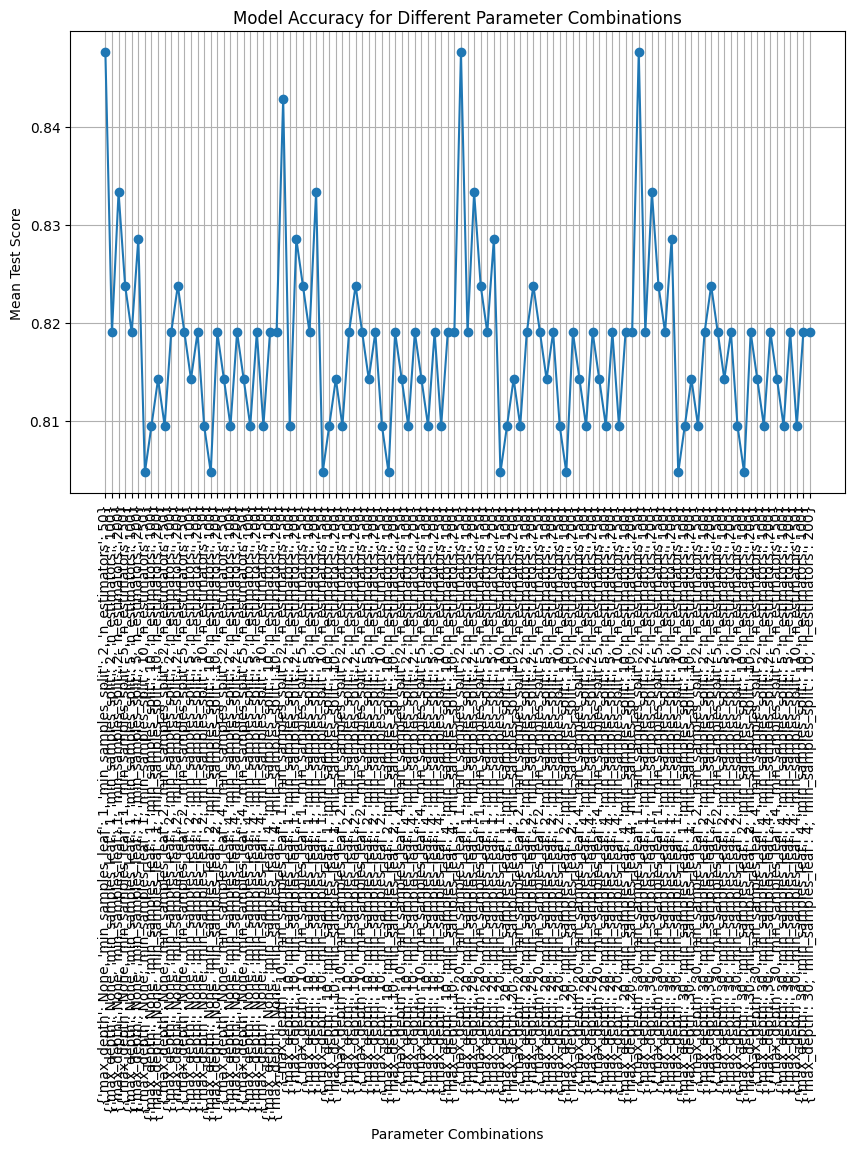

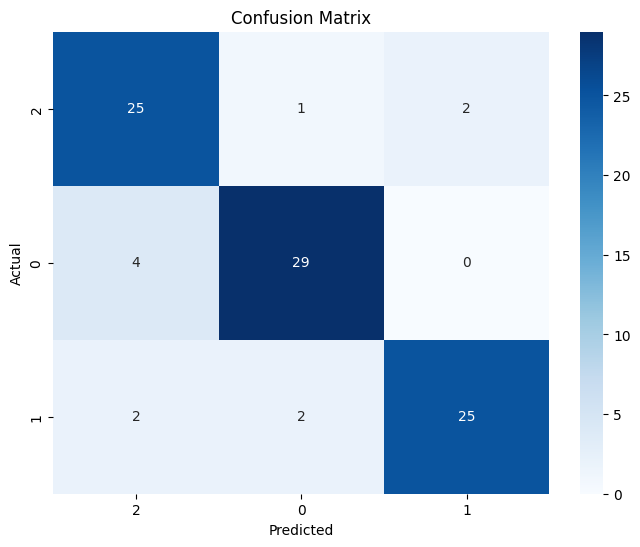

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
file_path = '/content/synthetic_iris_like_data.csv'
data = pd.read_csv(file_path)

# Split the data into features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, return_train_score=True)
grid_search.fit(X_train, y_train)

# Display the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the classifier with the best parameters
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred_best = rf_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_report_best = classification_report(y_test, y_pred_best)

print("Accuracy:", accuracy_best)
print("Classification Report:\n", classification_report_best)

# Plotting the model accuracy during grid search
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))

# Extract mean test scores for plotting
mean_test_scores = results['mean_test_score']
params = results['params']

# Create the plot
plt.plot(range(len(mean_test_scores)), mean_test_scores, marker='o')
plt.xticks(range(len(params)), [str(p) for p in params], rotation=90)
plt.xlabel('Parameter Combinations')
plt.ylabel('Mean Test Score')
plt.title('Model Accuracy for Different Parameter Combinations')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data['class'].unique(), yticklabels=data['class'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EmpiricalCovariance

# Load the original dataset
file_path = 'path_to_your_file/Train.csv'
original_data = pd.read_csv(file_path)

# Separate features and target
features = original_data.drop('class', axis=1)
target = original_data['class']

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit the EmpiricalCovariance model
cov_model = EmpiricalCovariance()
cov_model.fit(scaled_features)

# Generate synthetic samples
n_samples = 300
synthetic_scaled_features = np.random.multivariate_normal(
    mean=cov_model.location_,
    cov=cov_model.covariance_,
    size=n_samples
)

# Inverse transform the scaled synthetic samples to the original scale
synthetic_features = scaler.inverse_transform(synthetic_scaled_features)

# Create a new DataFrame for synthetic data
synthetic_data = pd.DataFrame(synthetic_features, columns=features.columns)

# Randomly sample the target values to match the number of synthetic rows
synthetic_target = np.random.choice(target, size=n_samples)

# Add the target column to the synthetic data
synthetic_data['class'] = synthetic_target

# Save the synthetic dataset to a CSV file
synthetic_data.to_csv('path_to_save_synthetic_data/synthetic_data.csv', index=False)

# Display the first few rows of the synthetic dataset
print(synthetic_data.head())


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EmpiricalCovariance

# Load the original dataset
file_path = '/content/Train.csv'
original_data = pd.read_csv(file_path)


# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit the EmpiricalCovariance model
cov_model = EmpiricalCovariance()
cov_model.fit(scaled_features)

# Generate synthetic samples
n_samples = 300
synthetic_scaled_features = np.random.multivariate_normal(
    mean=cov_model.location_,
    cov=cov_model.covariance_,
    size=n_samples
)

# Inverse transform the scaled synthetic samples to the original scale
synthetic_features = scaler.inverse_transform(synthetic_scaled_features)

# Create a new DataFrame for synthetic data
synthetic_data = pd.DataFrame(synthetic_features, columns=features.columns)

# Randomly sample the target values to match the number of synthetic rows
synthetic_target = np.random.choice(target, size=n_samples)

# Add the target column to the synthetic data
synthetic_data['class'] = synthetic_target

# Save the synthetic dataset to a CSV file
synthetic_data.to_csv('/content/synthetic_segmentation_data.csv', index=False)

# Display the first few rows of the synthetic dataset
print(synthetic_data.head())


NameError: name 'features' is not defined